In [74]:
import pandas as pd 
import matplotlib.pyplot as plt
from wordcloud import WordCloud

#lê o arquivo
stocks = pd.read_csv('b3_stocks_1994_2020.csv')

#converte para datetime
stocks['datetime'] = pd.to_datetime(stocks['datetime'])

#pega apenas o período que será utilizado
stocks = stocks[(stocks['datetime'] > '2015-01-01') & (stocks['datetime'] < '2017-12-30')]

#lê o arquivo de notícias normalizado 
news = pd.read_csv('articles_norm.csv')

#converte para datetime
news['date'] = pd.to_datetime(news['date'])

# hipóteses 
- talvez seja melhor atribuir um peso maior para as primeiras palavras do arquivo 

ESQUEMA
- notícias 
    - peso maior para primeiras palavras 
- dias com notícias 

In [75]:
stocks.head(2)

datetime  ticker   open  close   high    low     volume
1337436 2015-01-02  AAPL34  29.65  29.45  29.65  29.45   956435.0
1337437 2015-01-02   ABCB4  12.85  12.55  12.85  12.35  1469337.0

In [76]:
news.head(2)

Unnamed: 0                                              title  \
0           0  Lula diz que está 'lascado', mas que ainda tem...   
1           1  'Decidi ser escrava das mulheres que sofrem', ...   

                                                text       date   category  \
0  Com a possibilidade de uma condenação impedir ... 2017-09-10      poder   
1  Para Oumou Sangaré, cantora e ativista malines... 2017-09-10  ilustrada   

  subcategory                                               link  \
0         NaN  http://www1.folha.uol.com.br/poder/2017/10/192...   
1         NaN  http://www1.folha.uol.com.br/ilustrada/2017/10...   

                                          title_norm  \
0                lula diz ainda forca cabo eleitoral   
1  ser escrava mulheres sofrem diz cantora oumou ...   

                                           text_norm  
0  possibilidade condenacao impedir candidatura l...  
1  oumou sangare cantora ativista malinesa sofrim...

# Quais os termos que podem influenciar os outliers? 

In [77]:
# dias que fogem do padrão com aumento do volume e close
stocks_date_mean = stocks.groupby('datetime').sum()
stocks_date_mean[(stocks_date_mean['close'] > 40000) | (stocks_date_mean['volume'] > 1.3e+10)]

open     close      high       low        volume
datetime                                                        
2015-02-18  60858.83  60890.04  60956.63  60809.02  1.065172e+10
2015-04-15  64263.27  64258.44  64335.44  64190.10  9.039387e+09
2015-05-13  64653.58  64666.43  64729.40  64589.66  6.126561e+09
2015-06-17  61525.35  61508.51  61568.18  61457.11  8.658837e+09
2015-07-15  60244.32  60232.99  60289.22  60186.18  4.703410e+09
2015-08-12  61367.77  61357.59  61430.97  61281.03  1.206771e+10
2015-09-16  62777.74  62832.39  62908.06  62731.39  7.586552e+09
2015-10-14  61385.23  61341.00  61455.25  61293.36  1.254146e+10
2015-11-18  60573.25  60556.90  60628.37  60511.07  5.523740e+09
2015-12-16  59960.10  59976.23  60041.32  59872.68  1.321407e+10
2016-01-13  53333.50  53273.66  53386.02  53212.09  4.506832e+09
2016-02-17  53440.63  53453.16  53529.13  53378.06  1.238116e+10
2016-03-04  10438.29  10458.15  10593.28  10306.18  1.564136e+10
2016-03-16  59572.54  59579.53  59677.32  59468.48  7.448600e+09
2016-04-13  65265.96  65274.35  65397.58  65181.22  1.744701e+10
2016-05-18  65458.38  65467.16  65564.67  65380.79  6.919531e+09
2016-06-15  63917.58  63862.80  64004.66  63773.07  1.108990e+10
2016-07-13  72226.17  72262.32  72320.40  72169.97  7.228922e+09
2016-08-17  73086.78  73097.85  73160.41  72998.03  1.448748e+10
2016-09-14  67749.17  67736.89  67798.93  67679.96  5.918955e+09
2016-10-13  73019.00  73015.90  73094.68  72941.08  1.566480e+10
2016-11-10  21176.87  21145.90  21365.90  20919.43  1.514839e+10
2016-11-11  14900.01  14829.08  15039.02  14674.26  1.507721e+10
2016-11-16  78359.69  78454.86  78544.15  78261.79  1.050252e+10
2016-12-14  67481.97  67459.89  67558.28  67407.09  1.943764e+10
2017-01-18  73186.94  73166.22  73250.27  73109.93  7.375071e+09
2017-02-15  79116.94  79169.36  79250.60  79055.27  1.651203e+10
2017-03-15  76115.49  76177.87  76233.56  76018.98  9.033522e+09
2017-04-12  74332.85  74329.82  74399.13  74265.61  1.409060e+10
2017-05-17  79197.23  79196.69  79283.68  79099.98  7.814993e+09
2017-05-18  23275.33  23425.34  23628.84  23096.21  2.286908e+10
2017-06-14  72534.21  72557.42  72627.88  72468.71  1.540085e+10
2017-07-12  75884.27  75907.62  75972.05  75813.16  9.247421e+09
2017-08-16  80220.59  80231.50  80319.44  80128.55  1.524694e+10
2017-09-13  88248.35  88278.74  88359.58  88152.74  9.731507e+09
2017-09-15  18745.32  18818.87  18890.44  18675.38  1.514406e+10
2017-10-18  88782.89  88826.08  88889.45  88713.92  1.882922e+10
2017-11-16  84257.23  84323.41  84419.41  84195.57  9.239627e+09
2017-11-30  15458.45  15414.54  15539.83  15282.44  1.395938e+10
2017-12-13  90187.26  90176.22  90311.14  90078.71  2.009998e+10
2017-12-15  23330.75  23342.27  23450.27  23248.96  1.679029e+10

# Trabalhando com uma das datas 

In [78]:
news_week = news[((news['date'] < '2016-08-19') & (news['date'] > '2016-08-10'))] 
news_week.head(2)

Unnamed: 0                                              title  \
24912       25105                  Como é o programa de treinamento?   
36721       37011  Para ex-ministro Carlos Velloso, Supremo acert...   

                                                    text       date  \
24912  O 1º Programa de Treinamento em Jornalismo de ... 2016-08-11   
36721  O ex-ministro do Supremo Tribunal Federal e ad... 2016-08-12   

          category subcategory  \
24912  treinamento         NaN   
36721        poder         NaN   

                                                    link  \
24912  http://www1.folha.uol.com.br/treinamento/2016/...   
36721  http://www1.folha.uol.com.br/poder/2016/12/183...   

                                      title_norm  \
24912                       programa treinamento   
36721  carlos velloso supremo acertou caso renan   

                                               text_norm  
24912  programa treinamento jornalismo agroindustria ...  
36721  supremo tribunal federal advogado carlos vello...

In [95]:
news_week = news.query("category == 'poder'")
news_week.head(2)

Unnamed: 0                                              title  \
0           0  Lula diz que está 'lascado', mas que ainda tem...   
2           2  Três reportagens da Folha ganham Prêmio Petrob...   

                                                text       date category  \
0  Com a possibilidade de uma condenação impedir ... 2017-09-10    poder   
2  Três reportagens da Folha foram vencedoras do ... 2017-09-10    poder   

  subcategory                                               link  \
0         NaN  http://www1.folha.uol.com.br/poder/2017/10/192...   
2         NaN  http://www1.folha.uol.com.br/poder/2017/10/192...   

                                          title_norm  \
0                lula diz ainda forca cabo eleitoral   
2  tres reportagens folha ganham premio petrobras...   

                                           text_norm  
0  possibilidade condenacao impedir candidatura l...  
2  tres reportagens folha vencedoras premio petro...

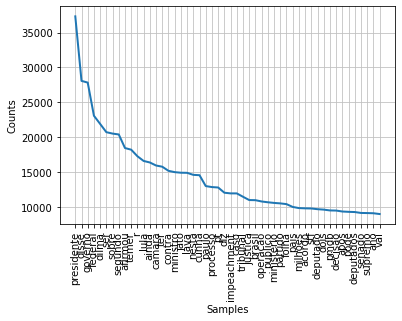

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [96]:
from nltk.probability import FreqDist

title_norm_join = ' '.join((news_week['text_norm']).astype(str))
title_norm_join

titlefreqDist = FreqDist((title_norm_join.split(" ")))
titlefreqDist.plot(50)

# ngram 

- aparentemente bigrams definem melhor do que uma única palavra 

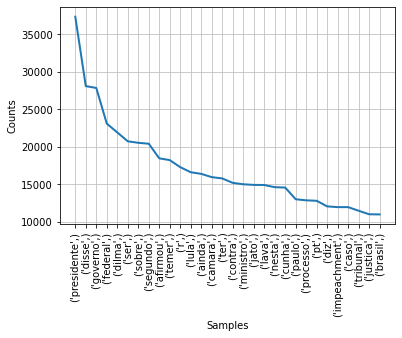

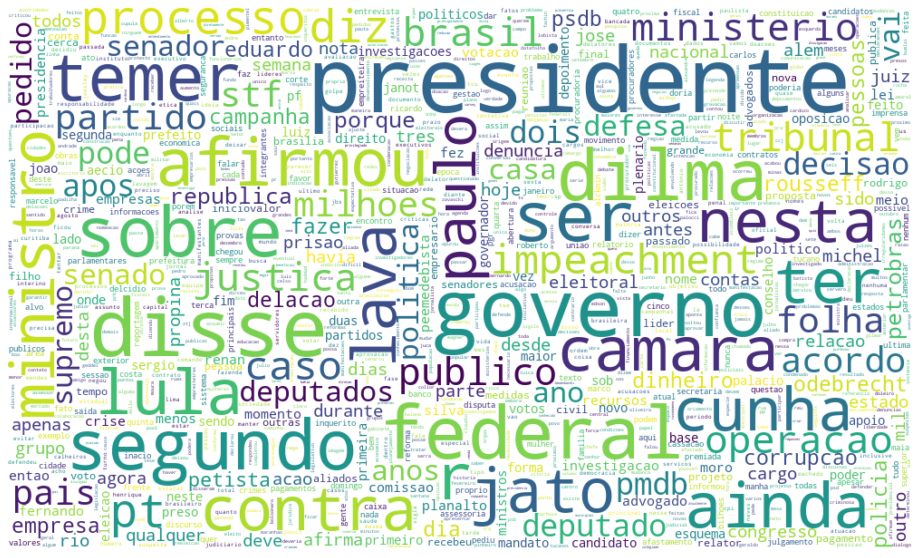

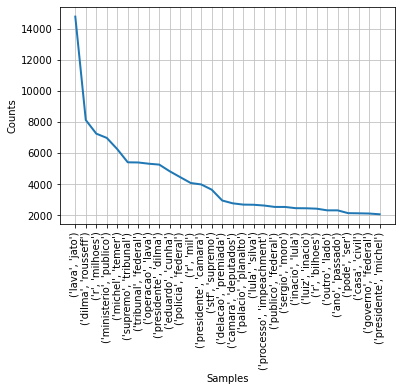

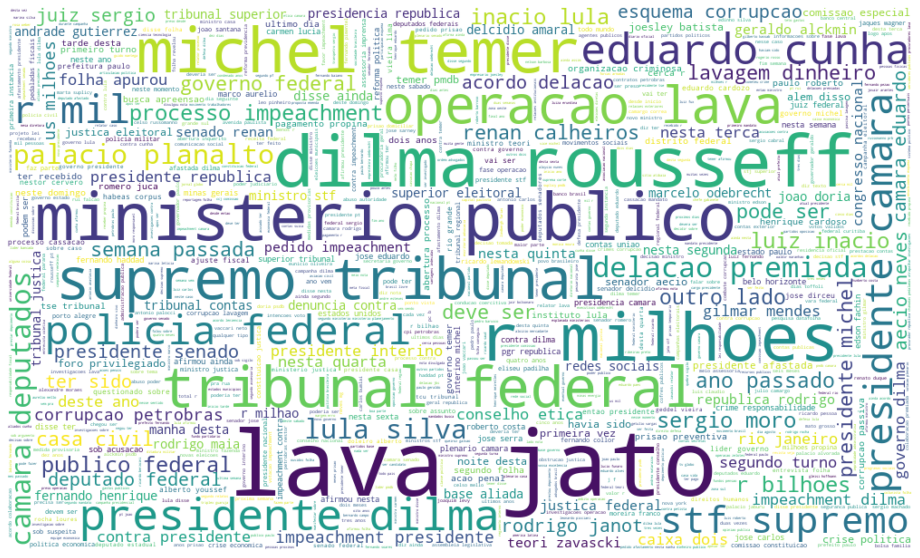

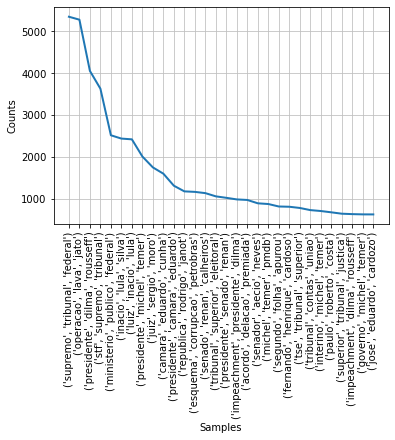

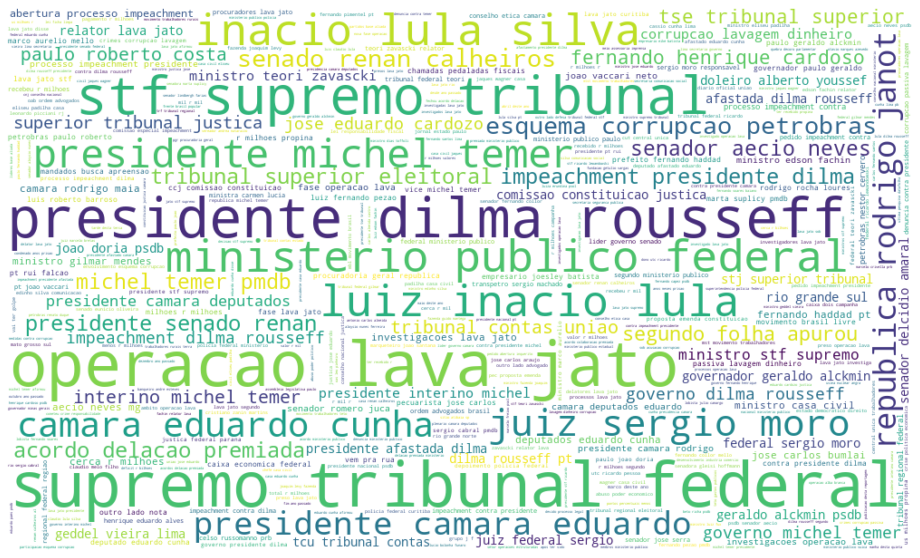

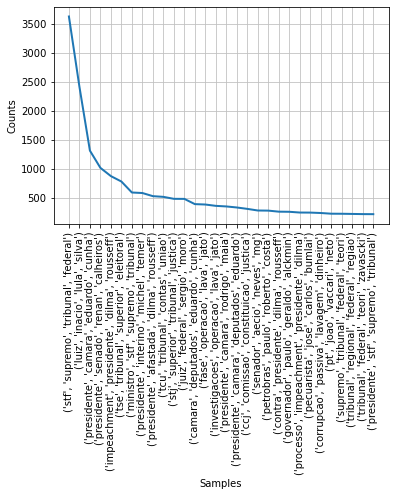

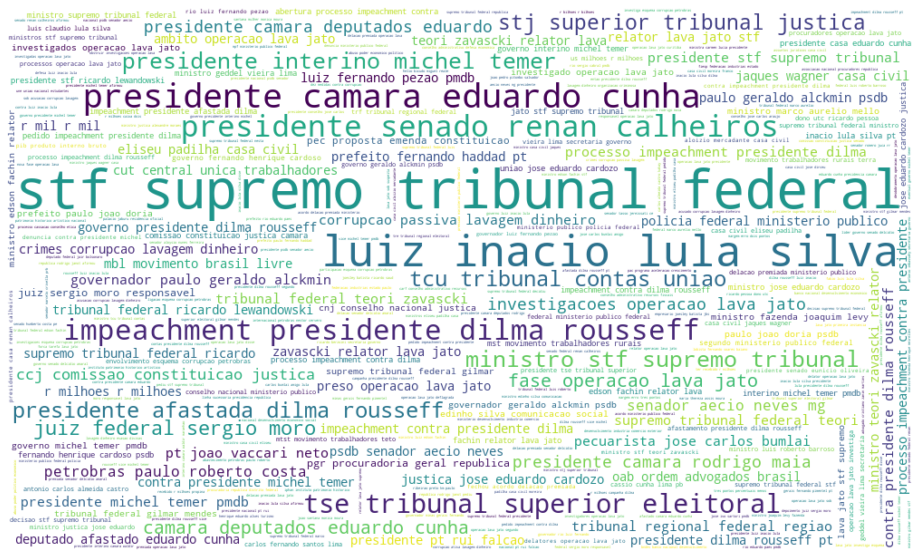

In [97]:
from nltk.util import ngrams    
from nltk import bigrams
from nltk import word_tokenize
import matplotlib.pyplot as plt
from wordcloud import WordCloud

tokens = word_tokenize(title_norm_join)
for i in range(1,5): 
    dicionario = {}
    n_grams = ngrams(tokens, i)
    fdist = FreqDist(n_grams)
    for k,v in fdist.items():
        dicionario[' '.join(k)] = v
    fdist.plot(30)
    # cria uma nuvem de palabras através do dicionário 
    wordcloud = WordCloud(max_font_size=100, max_words=1000, background_color="white", width=1000, height=600)
    wordcloud.generate_from_frequencies(frequencies=dicionario)
    plt.figure(figsize=[20,10])
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

# apriori  

In [98]:
#Usando a implementação do Apriori disponível na biblioteca mlxtend
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.preprocessing import TransactionEncoder

import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

#Formato de lista de listas (cada lista simula uma transação)
# tranactions_exmplo  =   [['Pao','Leite', 'Manteiga'],
#                          ['Pao','Leite','Acucar'],
#                          ['Pao'],
#                          ['Pao','Leite'],
#                          ['Pao','Leite','Manteiga','Acucar']]

words_list = news_week['title_norm'].apply(lambda x: str(x).split(' '))
words_of_news = words_list.tolist()


#Recurso da biblioteca mlxtend para codificar transações no padrão one-hot dataframe.
te = TransactionEncoder()
encoded = te.fit(words_of_news).transform(words_of_news)

dfExemplo = pd.DataFrame(encoded, columns=te.columns_)
dfExemplo

abafa  abafar  abaixar  abaixo  abala  abalada  abalado  abalam  \
0      False   False    False   False  False    False    False   False   
1      False   False    False   False  False    False    False   False   
2      False   False    False   False  False    False    False   False   
3      False   False    False   False  False    False    False   False   
4      False   False    False   False  False    False    False   False   
...      ...     ...      ...     ...    ...      ...      ...     ...   
18084  False   False    False   False  False    False    False   False   
18085  False   False    False   False  False    False    False   False   
18086  False   False    False   False  False    False    False   False   
18087  False   False    False   False  False    False    False   False   
18088  False   False    False   False  False    False    False   False   

       abalar  abalo  ...  zerou   zika  zomba   zona  zonas  zoneamento  \
0       False  False  ...  False  False  False  False  False       False   
1       False  False  ...  False  False  False  False  False       False   
2       False  False  ...  False  False  False  False  False       False   
3       False  False  ...  False  False  False  False  False       False   
4       False  False  ...  False  False  False  False  False       False   
...       ...    ...  ...    ...    ...    ...    ...    ...         ...   
18084   False  False  ...  False  False  False  False  False       False   
18085   False  False  ...  False  False  False  False  False       False   
18086   False  False  ...  False  False  False  False  False       False   
18087   False  False  ...  False  False  False  False  False       False   
18088   False  False  ...  False  False  False  False  False       False   

       zoologico  zorro  zumbis  zveiter  
0          False  False   False    False  
1          False  False   False    False  
2          False  False   False    False  
3          False  False   False    False  
4          False  False   False    False  
...          ...    ...     ...      ...  
18084      False  False   False    False  
18085      False  False   False    False  
18086      False  False   False    False  
18087      False  False   False    False  
18088      False  False   False    False  

[18089 rows x 12304 columns]

In [109]:
frequent_itemsets = apriori(dfExemplo, min_support=0.005, use_colnames=True)
frequent_itemsets

support            itemsets
0    0.015866              (acao)
1    0.009509            (acordo)
2    0.008845          (advogado)
3    0.018907             (aecio)
4    0.006081       (afastamento)
..        ...                 ...
276  0.005805         (pede, stf)
277  0.006413        (sobre, stf)
278  0.007242      (sobre, temer)
279  0.012715   (jato, diz, lava)
280  0.006468  (jato, lula, lava)

[281 rows x 2 columns]

In [114]:
#### Regras com o valor de confiança mínimo escolhido
dfRegras= association_rules(frequent_itemsets, metric='confidence', min_threshold=0.5)
dfRegras.head(40)

antecedents   consequents  antecedent support  consequent support  \
0     (cassacao)       (cunha)            0.011222            0.076455   
1     (conselho)       (etica)            0.008403            0.007021   
2        (etica)    (conselho)            0.007021            0.008403   
3      (eduardo)       (cunha)            0.008679            0.076455   
4      (delator)         (diz)            0.014097            0.219968   
5          (ter)         (diz)            0.016308            0.219968   
6       (mendes)      (gilmar)            0.007795            0.010669   
7       (gilmar)      (mendes)            0.010669            0.007795   
8         (jato)        (lava)            0.067500            0.066891   
9         (lava)        (jato)            0.066891            0.067500   
10          (mi)           (r)            0.009564            0.027254   
11      (michel)       (temer)            0.005584            0.109846   
12         (mil)           (r)            0.007795            0.027254   
13     (milhoes)           (r)            0.007684            0.027254   
14     (publico)  (ministerio)            0.009066            0.012991   
15   (jato, diz)        (lava)            0.012881            0.066891   
16   (diz, lava)        (jato)            0.012715            0.067500   
17  (lula, jato)        (lava)            0.006523            0.066891   
18  (lula, lava)        (jato)            0.006468            0.067500   

     support  confidence       lift  leverage   conviction  
0   0.007021    0.625616   8.182765  0.006163     2.466836  
1   0.005141    0.611842  87.146550  0.005082     2.558184  
2   0.005141    0.732283  87.146550  0.005082     3.703907  
3   0.006468    0.745223   9.747171  0.005804     3.624913  
4   0.007242    0.513725   2.335456  0.004141     1.604098  
5   0.008348    0.511864   2.326996  0.004760     1.597982  
6   0.006579    0.843972  79.101569  0.006495     6.340709  
7   0.006579    0.616580  79.101569  0.006495     2.587778  
8   0.066836    0.990172  14.802662  0.062321    94.943792  
9   0.066836    0.999174  14.802662  0.062321  1128.325502  
10  0.008900    0.930636  34.146596  0.008640    14.023753  
11  0.005528    0.990099   9.013538  0.004915    89.905578  
12  0.005584    0.716312  26.282695  0.005371     3.428929  
13  0.006247    0.812950  29.828491  0.006037     5.200449  
14  0.006468    0.713415  54.914712  0.006350     3.444030  
15  0.012715    0.987124  14.757103  0.011853    72.471428  
16  0.012715    1.000000  14.814906  0.011857          inf  
17  0.006468    0.991525  14.822895  0.006032   110.106805  
18  0.006468    1.000000  14.814906  0.006031          inf

In [117]:
#### Regras com o valor de confiança mínimo escolhido
dfRegras= association_rules(frequent_itemsets, metric='confidence', min_threshold=0.4)
dfRegras.sort_values('conviction', ascending=False).head(40)

antecedents   consequents  antecedent support  consequent support  \
22  (lula, lava)        (jato)            0.006468            0.067500   
20   (diz, lava)        (jato)            0.012715            0.067500   
12        (lava)        (jato)            0.066891            0.067500   
21  (lula, jato)        (lava)            0.006523            0.066891   
11        (jato)        (lava)            0.067500            0.066891   
14      (michel)       (temer)            0.005584            0.109846   
19   (jato, diz)        (lava)            0.012881            0.066891   
13          (mi)           (r)            0.009564            0.027254   
9       (mendes)      (gilmar)            0.007795            0.010669   
16     (milhoes)           (r)            0.007684            0.027254   
2        (etica)    (conselho)            0.007021            0.008403   
4      (eduardo)       (cunha)            0.008679            0.076455   
17     (publico)  (ministerio)            0.009066            0.012991   
15         (mil)           (r)            0.007795            0.027254   
10      (gilmar)      (mendes)            0.010669            0.007795   
1     (conselho)       (etica)            0.008403            0.007021   
0     (cassacao)       (cunha)            0.011222            0.076455   
18  (ministerio)     (publico)            0.012991            0.009066   
5      (delator)         (diz)            0.014097            0.219968   
8          (ter)         (diz)            0.016308            0.219968   
3     (denuncia)      (contra)            0.019293            0.063464   
7          (ser)         (diz)            0.019846            0.219968   
6      (propina)         (diz)            0.019957            0.219968   

     support  confidence       lift  leverage   conviction  
22  0.006468    1.000000  14.814906  0.006031          inf  
20  0.012715    1.000000  14.814906  0.011857          inf  
12  0.066836    0.999174  14.802662  0.062321  1128.325502  
21  0.006468    0.991525  14.822895  0.006032   110.106805  
11  0.066836    0.990172  14.802662  0.062321    94.943792  
14  0.005528    0.990099   9.013538  0.004915    89.905578  
19  0.012715    0.987124  14.757103  0.011853    72.471428  
13  0.008900    0.930636  34.146596  0.008640    14.023753  
9   0.006579    0.843972  79.101569  0.006495     6.340709  
16  0.006247    0.812950  29.828491  0.006037     5.200449  
2   0.005141    0.732283  87.146550  0.005082     3.703907  
4   0.006468    0.745223   9.747171  0.005804     3.624913  
17  0.006468    0.713415  54.914712  0.006350     3.444030  
15  0.005584    0.716312  26.282695  0.005371     3.428929  
10  0.006579    0.616580  79.101569  0.006495     2.587778  
1   0.005141    0.611842  87.146550  0.005082     2.558184  
0   0.007021    0.625616   8.182765  0.006163     2.466836  
18  0.006468    0.497872  54.914712  0.006350     1.973470  
5   0.007242    0.513725   2.335456  0.004141     1.604098  
8   0.008348    0.511864   2.326996  0.004760     1.597982  
3   0.007850    0.406877   6.411145  0.006626     1.578991  
7   0.008292    0.417827   1.899492  0.003927     1.339864  
6   0.008126    0.407202   1.851189  0.003737     1.315848

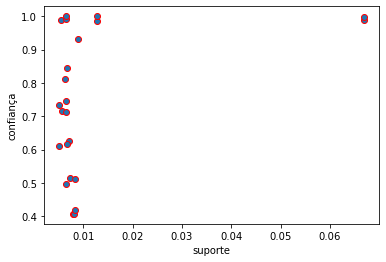

In [116]:
#Scatter plot da confiança e suporte. Auxilia no entendimento do espaço de regras
plt.scatter(data = dfRegras, x='support', y='confidence', edgecolors='red')
plt.xlabel('suporte')
plt.ylabel('confiança')
plt.show()

In [113]:
#Filtrando regras apenas com o consequente "Sobreviveu" ou "Morreu"
dfRegras[(dfRegras['consequents'] == {'lula'}) | (dfRegras['consequents'] == {'moro'}) ]

Empty DataFrame
Columns: [antecedents, consequents, antecedent support, consequent support, support, confidence, lift, leverage, conviction]
Index: []